In [1]:
%matplotlib inline
from utils import preprocess

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
from keras.models import Model
from keras.layers import Dense, Activation, Dropout
from keras.layers import Input

Using TensorFlow backend.


In [4]:
DATA_PATH = os.path.join('../data')
TRAIN_FILE = os.path.join(DATA_PATH, 'train.csv')
TEST_FILE = os.path.join(DATA_PATH, 'test.csv')

In [5]:
train_features = preprocess(TRAIN_FILE)
test_features = preprocess(TEST_FILE)

In [6]:
train_features = train_features[['vendor_id', 'passenger_count',
       'trip_duration', 'pickup_hr', 'pickup_min', 'pickup_sec',
       'pickup_day', 'pickup_date', 'pickup_mon',
       's_pickup_latitude', 's_pickup_longitude', 's_dropoff_latitude',
       's_dropoff_longitude', 'flag', 'cityblock']]

In [7]:
test_features = test_features[['vendor_id', 'passenger_count','pickup_hr', 'pickup_min', 'pickup_sec',
       'pickup_day', 'pickup_date', 'pickup_mon',
       's_pickup_latitude', 's_pickup_longitude', 's_dropoff_latitude',
       's_dropoff_longitude', 'flag', 'cityblock']]

In [8]:
X_train = train_features[['vendor_id', 'passenger_count',
        'pickup_hr', 'pickup_min', 'pickup_sec',
       'pickup_day', 'pickup_date', 'pickup_mon',
       's_pickup_latitude', 's_pickup_longitude', 's_dropoff_latitude',
       's_dropoff_longitude', 'flag', 'cityblock']].as_matrix()
y_train = train_features['trip_duration']

In [9]:
X_test = test_features.as_matrix()

In [10]:
print X_train.shape
print y_train.shape
print X_test.shape

(1458644, 14)
(1458644,)
(625134, 14)


In [11]:
from keras.optimizers import Adam

In [12]:
learning_rate = 0.0005

In [13]:
from keras import backend as K
def root_mean_squared_logarithmic_error(y_true, y_pred):
    #y_pred = K.round(y_pred)
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log)))

rmsle = root_mean_squared_logarithmic_error

In [14]:
_input = Input(shape=(14,))
layer1 = Dense(50, activation='relu')(_input)
layer2 = Dense(15, activation='linear')(layer1)
_output = Dense(1, activation='linear')(layer2)

model = Model(inputs=[_input], outputs=[_output])
model.compile(optimizer=Adam(learning_rate),
             loss=rmsle)

In [15]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('weights.h5', save_best_only=True,
                             monitor='val_loss', verbose=0)
results = model.fit(X_train, y_train, 
                    batch_size=1024,
                    epochs=100, callbacks=[checkpoint],
                    validation_split=0.2)

Train on 1166915 samples, validate on 291729 samples
Epoch 1/100
1166915/1166915 [==============================] - 5s - loss: 1.2892 - val_loss: 0.8290
Epoch 2/100
1166915/1166915 [==============================] - 4s - loss: 0.8181 - val_loss: 0.8102
Epoch 3/100
1166915/1166915 [==============================] - 4s - loss: 0.8052 - val_loss: 0.8013
Epoch 4/100
1166915/1166915 [==============================] - 4s - loss: 0.7976 - val_loss: 0.7943
Epoch 5/100
1166915/1166915 [==============================] - 5s - loss: 0.7907 - val_loss: 0.7871
Epoch 6/100
1166915/1166915 [==============================] - 4s - loss: 0.7829 - val_loss: 0.7787
Epoch 7/100
1166915/1166915 [==============================] - 5s - loss: 0.7730 - val_loss: 0.7662
Epoch 8/100
1166915/1166915 [==============================] - 4s - loss: 0.7545 - val_loss: 0.7385
Epoch 9/100
1166915/1166915 [==============================] - 4s - loss: 0.7108 - val_loss: 0.6750
Epoch 10/100
1166915/1166915 [=================

1166915/1166915 [==============================] - 4s - loss: 0.5188 - val_loss: 0.5203
Epoch 82/100
1166915/1166915 [==============================] - 4s - loss: 0.5186 - val_loss: 0.5165
Epoch 83/100
1166915/1166915 [==============================] - 4s - loss: 0.5190 - val_loss: 0.5199
Epoch 84/100
1166915/1166915 [==============================] - 4s - loss: 0.5187 - val_loss: 0.5165
Epoch 85/100
1166915/1166915 [==============================] - 4s - loss: 0.5185 - val_loss: 0.5167
Epoch 86/100
1166915/1166915 [==============================] - 4s - loss: 0.5186 - val_loss: 0.5167
Epoch 87/100
1166915/1166915 [==============================] - 4s - loss: 0.5189 - val_loss: 0.5174
Epoch 88/100
1166915/1166915 [==============================] - 4s - loss: 0.5184 - val_loss: 0.5173
Epoch 89/100
1166915/1166915 [==============================] - 4s - loss: 0.5182 - val_loss: 0.5185
Epoch 90/100
1166915/1166915 [==============================] - 4s - loss: 0.5188 - val_loss: 0.5224
Epo

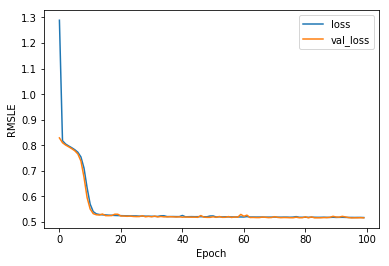

In [16]:
from matplotlib import pyplot as plt
plt.plot(results.epoch, results.history['loss'], label='loss')
plt.plot(results.epoch, results.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('RMSLE')
plt.legend()
plt.show()

In [19]:
test_features = preprocess(TEST_FILE)

In [22]:
test_features = test_features[['id', 'vendor_id', 'passenger_count','pickup_hr', 'pickup_min', 'pickup_sec',
       'pickup_day', 'pickup_date', 'pickup_mon',
       's_pickup_latitude', 's_pickup_longitude', 's_dropoff_latitude',
       's_dropoff_longitude', 'flag', 'cityblock']]

In [21]:
model.load_weights('weights.h5')
with open('predictions.txt', 'w') as _file:
    _file.write('id,trip_duration\n')
    for example in test_features.as_matrix():
        tid, pred = example[0], model.predict(np.array([example[1:]]))
        pred = pred[0][0]
        _file.write('{},{}\n'.format(tid, pred))

In [23]:
!wc -l predictions.txt

  625135 predictions.txt
